In [1]:
from psychopy import visual, core, event #import some libraries from PsychoPy

#create a window - depend on computers in lab 
mywin = visual.Window([800,600],monitor="testMonitor", units="deg")

# stimuli generation
grating = visual.GratingStim(win=mywin, mask='circle', size=3, pos=[-4,0], sf=3)
fixation = visual.GratingStim(win=mywin, size=0.2, pos=[0,0], sf=0, rgb=-1)

#draw the stimuli and update the window
while True: #this creates a never-ending loop
    grating.setPhase(0.05, '+')#advance phase by 0.05 of a cycle
    grating.draw()
    fixation.draw()
    mywin.flip()

    if len(event.getKeys())>0:
        break
    event.clearEvents()

#cleanup
mywin.close()
core.quit()

pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html
2.3691 	WARNING 	Monitor specification not found. Creating a temporary one...
5.1091 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead


SystemExit: 0

f:\software\2python\envs\psypy3\lib\site-packages\IPython\core\interactiveshell.py:3334: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


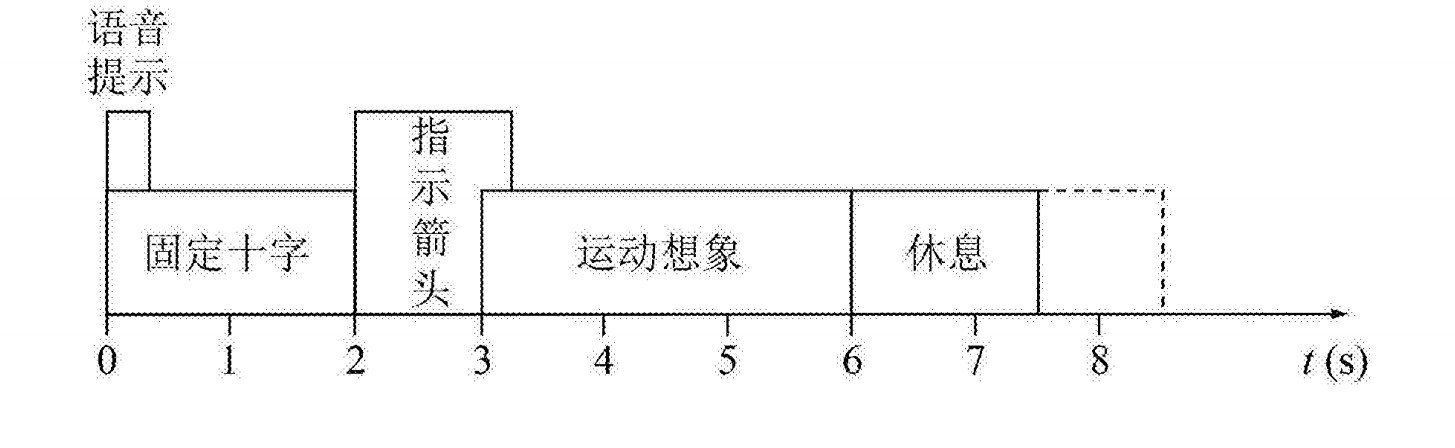

In [3]:
from IPython.display import Image
Image("paradigm1.jpg")

# JinBiao's Exp paradigm building

The following variables including inputs and outputs should be considered:
- the time annotation since the python window is not able to communicate with python (maybe by LCL, we can have access the data in real time, but in the begining stage, we put this idea aside). The time annotation will help us segment the signal later when processing it
- a verbal instruction should be given out - or a computer-synthesized sound should be recorded at the begining of the paradigm

In [1]:
# Utils py file
# Run before start the Exp
# Author: Gansheng TAN ,19 sept 2019
def showRightArrow():
    upperLine = visual.Line(win=mywin,start=(0, 1), end=(1, 0))
    lowerLine = visual.Line(win=mywin,start=(0, -1), end=(1, 0))
    horizontalLine = visual.Line(win=mywin,start=(-2, 0), end=(1, 0))
    upperLine.draw()
    lowerLine.draw()
    horizontalLine.draw()
    mywin.flip()
    return True

def showLeftArrow():
    upperLine = visual.Line(win=mywin,start=(0, 1), end=(-1, 0))
    lowerLine = visual.Line(win=mywin,start=(0, -1), end=(-1, 0))
    horizontalLine = visual.Line(win=mywin,start=(2, 0), end=(-1, 0))
    upperLine.draw()
    lowerLine.draw()
    horizontalLine.draw()
    mywin.flip()

In [7]:
# ctrl+enter to start the Exp
from psychopy import visual, core, event
from psychopy import sound
import numpy as np
import pandas as pd

# consulting the following examples anad Enter path and max_times manually
max_times = 100
labels_fn = r'F:\software\1NE_NIC2\raw\motor_imagine_data\labels\100times_test_section2.csv'

# variables setting
labels_df_ini = {'index':[0],'label':['leftOrRight']}
labels_df = pd.DataFrame(labels_df_ini)

beginTone = sound.backend_sounddevice.SoundDeviceSound(secs=1)
# flip(clearBuffer=True)[source]
# Flip the front and back buffers after drawing everything for your frame.
# (This replaces the update() method, better reflecting what is happening underneath).

# create window and begin welcoming words
mywin = visual.Window([1500,800],monitor="testMonitor", units="deg")
welcomingMessage = visual.TextStim(mywin, pos=(8, 0.0),
                                   text='Please listen to the guide from instrutor, and press keyboard=s to start the experiment')

#counter = 0


while True: #this creates a never-ending loop
    welcomingMessage.autoDraw = True  # Automatically draw every frame
    mywin.flip()
    if event.getKeys()==['s']:
        break
    event.clearEvents()
    
for i in range(max_times):
    # turn black and begin the experiment
    welcomingMessage.autoDraw = False
    mywin.flip()
    clock = core.Clock()
    while clock.getTime() < 1.0:  # Clock times are in seconds
        mywin.flip()
        if event.getKeys()==['e']:
            mywin.close()
            core.quit()
            break
        event.clearEvents()

    beginTone = sound.backend_sounddevice.SoundDeviceSound(secs=1)
    beginTone.play()
    while clock.getTime()<3.0:   
        cross = visual.GratingStim(win=mywin, size=2, pos=[0,0], sf=0, rgb=-1,mask='cross')
        cross.draw()
        mywin.flip()
        if event.getKeys()==['e']:
            mywin.close()
            core.quit()
            break
        event.clearEvents()


    direction = np.random.choice(a=['left','right'],p =[0.5,0.5])
    labels_df = labels_df.append({'index':i,'label':direction},ignore_index=True)
    while clock.getTime() < 7.0:
        if direction =='left':
            showLeftArrow()
            
        elif direction == 'right':
            showRightArrow()
        else:
            print('undefined direction')

        if event.getKeys()==['e']:
            mywin.close()
            core.quit()
            break
        event.clearEvents()
        
    while clock.getTime() <8.0:
        if event.getKeys()==['e']:
            mywin.close()
            core.quit()
            break
        mywin.flip()


#cleanup
mywin.close()
core.quit()




3240.8709 	WARNING 	Couldn't measure a consistent frame rate.
  - Is your graphics card set to sync to vertical blank?
  - Are you running other processes on your computer?

3240.9292 	WARNING 	t of last frame was 58.79ms (=1/17)
3245.2797 	WARNING 	t of last frame was 20.62ms (=1/48)
3250.3869 	WARNING 	t of last frame was 21.72ms (=1/46)
3254.1899 	WARNING 	t of last frame was 21.34ms (=1/46)
3266.9698 	WARNING 	Multiple dropped frames have occurred - I'll stop bothering you about them!
3278.6149 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3278.6546 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3278.6734 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3278.6927 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3278.7146 	WARNING 	Use of rgb arguments to stimuli ar

3280.0330 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3280.0627 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3280.0829 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3280.0984 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3280.1176 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3280.1354 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3280.1533 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3280.1814 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3280.1999 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

3287.5435 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3287.5721 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3287.5927 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3287.6091 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3287.6250 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3287.6504 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3287.6745 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3287.6913 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3287.7097 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

3295.0249 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3295.0469 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3295.0694 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3295.0903 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3295.1144 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3295.1373 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3295.1606 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3295.1815 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3295.2038 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

3296.5684 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3296.5843 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3296.6011 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3296.6171 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3296.6347 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3296.6510 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3302.6897 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3302.7102 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3302.7290 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

3304.0256 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3304.0446 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3304.0614 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3304.0814 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3304.1055 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3304.1258 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3304.1419 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3304.1592 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3304.1753 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

3311.4993 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3311.5202 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3311.5413 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3311.5647 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3311.5852 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3311.6032 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3311.6312 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3311.6507 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3311.6688 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

3318.9905 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3319.0095 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3319.0387 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3319.0591 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3319.0747 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3319.0954 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3319.1151 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3319.1371 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3319.1556 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

3320.4516 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3320.4690 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3320.4894 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3320.5114 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3320.5271 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3320.5451 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3320.5599 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3320.5791 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3320.5942 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

3327.9361 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3327.9654 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3327.9857 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3328.0037 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3328.0336 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3328.0538 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3328.0707 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3328.0869 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3328.1034 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

3335.4113 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3335.4348 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3335.4590 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3335.4798 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3335.4962 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3335.5135 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3335.5318 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3335.5556 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3335.5791 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

3342.8520 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3342.8696 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3342.8882 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3342.9153 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3342.9362 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3342.9512 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3342.9690 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3342.9858 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3343.0036 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

3344.3532 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3344.3722 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3344.3888 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3344.4049 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3344.4336 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3344.4537 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3344.4699 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3344.4878 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3344.5182 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

3351.8788 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3351.9084 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3351.9287 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3351.9447 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3351.9629 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3351.9918 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3352.0130 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3352.0296 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3352.0584 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

3359.3893 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3359.4052 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3359.4263 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3359.4450 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3359.4672 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3359.4890 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3359.5151 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3359.5380 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3359.5540 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

3366.9418 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3366.9633 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3366.9805 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3367.0108 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3367.0290 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3367.0468 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3367.0646 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3367.0838 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3367.1099 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

3368.4317 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3368.4481 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3368.4655 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3368.4946 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3368.5141 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3368.5311 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3368.5486 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3368.5646 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3368.5811 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

3375.9737 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3375.9891 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3376.0068 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3376.0350 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3376.0560 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3376.0710 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3376.0892 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3376.1191 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3376.1385 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

3383.4848 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3383.5111 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3383.5310 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3383.5602 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3383.5801 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3383.5963 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3383.6150 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3383.6293 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3383.6490 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

3391.0245 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3391.0423 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3391.0694 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3391.0901 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3391.1069 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3391.1249 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3391.1515 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3391.1725 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3391.1878 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

3392.5414 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3392.5574 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3392.5732 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3392.5913 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3392.6064 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3392.6239 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3392.6394 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3392.6570 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3392.6734 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

3400.0322 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3400.0615 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3400.0823 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3400.0973 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3400.1159 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3400.1318 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3400.1497 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3400.1782 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3400.1988 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

3407.5486 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3407.5710 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3407.5911 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3407.6085 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3407.6314 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3407.6537 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3407.6752 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3407.6931 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3407.7198 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

3415.0657 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3415.0825 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3415.1000 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3415.1295 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3415.1488 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3415.1663 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3415.1838 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3415.2028 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3415.2268 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

3416.5010 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3416.5310 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3416.5506 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3416.5669 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3416.5837 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3416.5987 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3416.6175 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3416.6339 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3416.6518 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

3424.0545 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3424.0767 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3424.0955 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3424.1140 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3424.1322 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3424.1551 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3424.1754 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3424.1931 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3424.2211 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

3431.5851 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3431.6012 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3431.6231 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3431.6427 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3431.6630 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3431.6828 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3431.7136 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3431.7329 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3431.7512 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

3433.0513 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3433.0827 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3439.1230 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3439.1425 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3439.1578 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3439.1763 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3439.1928 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3439.2112 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3439.2386 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

3440.4765 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3440.4948 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3440.5107 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3440.5410 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3440.5609 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3440.5899 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3440.6092 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3440.6255 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3440.6457 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

3448.0047 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3448.0317 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3448.0508 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3448.0671 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3448.0855 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3448.1148 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3448.1357 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3448.1547 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3448.1811 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

3455.5419 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3455.5613 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3455.5789 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3455.5953 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3455.6225 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3455.6443 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3455.6729 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3455.6933 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3455.7122 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

3457.0945 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3457.1160 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3457.1416 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3457.1631 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3463.2014 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3463.2172 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3463.2357 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3463.2646 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3463.2846 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

3464.6663 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3464.6858 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3464.7018 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3464.7201 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3464.7354 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3464.7539 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3464.7825 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3464.8032 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3464.8194 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

3472.1447 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3472.1746 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3472.1979 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3472.2124 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3472.2395 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3472.2608 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3472.2768 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3472.2943 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3472.3108 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

3479.6235 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3479.6476 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3479.6641 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3479.6847 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3479.7048 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3479.7238 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3479.7442 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3479.7643 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3479.7803 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

3481.1059 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3481.1203 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3481.1384 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3481.1582 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3481.1838 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3481.2017 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3481.2192 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3481.2383 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3487.2777 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

3488.6681 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3488.6942 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3488.7148 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3488.7331 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3488.7524 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3488.7720 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3488.7897 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3488.8126 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3488.8312 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

3496.1711 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3496.1892 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3496.2074 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3496.2337 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3496.2543 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3496.2726 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3496.2888 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3496.3053 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3496.3217 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

3503.6256 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3503.6466 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3503.6631 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3503.6792 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3503.6945 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3503.7259 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3503.7489 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3503.7657 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3503.7828 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

3505.0278 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3505.0484 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3505.0782 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3505.0988 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3505.1275 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3505.1484 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3505.1642 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3505.1829 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3505.2134 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

3512.4888 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3512.5059 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3512.5224 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3512.5523 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3512.5731 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3512.6019 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3512.6223 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3512.6381 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3512.6557 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

3519.9652 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3519.9933 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3520.0134 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3520.0296 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3520.0488 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3520.0651 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3520.0938 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3520.1145 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3520.1342 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

3527.5073 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3527.5249 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3527.5430 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3527.5644 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3527.5832 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3527.6055 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3527.6246 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3527.6426 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3527.6643 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

3529.0069 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3529.0228 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3529.0408 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3529.0701 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3529.0910 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3529.1202 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3529.1406 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3529.1563 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3529.1754 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

3536.6310 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3536.6490 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3536.6650 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3536.6830 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3536.7118 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3536.7322 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3536.7622 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3536.7825 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3536.7985 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

3544.1410 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3544.1701 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3544.1904 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3544.2097 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3544.2389 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3544.2585 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3544.2795 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3544.3057 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3544.3252 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

3551.6319 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3551.6488 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3551.6791 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3551.6987 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3551.7151 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3551.7342 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3551.7630 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3551.7825 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3551.8027 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

3553.1743 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3553.1995 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3553.2198 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3553.2340 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3553.2526 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3553.2708 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3553.2974 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3553.3170 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3553.3470 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

3560.6924 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3560.7078 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3560.7272 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3560.7429 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3560.7725 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3560.7920 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3560.8081 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3560.8261 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3560.8553 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

3568.1495 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3568.1676 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3568.1979 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3568.2188 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3568.2351 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3568.2647 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3568.2847 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3568.3017 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3568.3180 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

3575.6628 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3575.6812 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3575.7071 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3575.7282 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3575.7425 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3575.7611 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3575.7893 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3575.8082 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3575.8242 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

3577.0936 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3577.1098 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3577.1290 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3577.1569 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3577.1763 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3577.1929 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3577.2109 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3577.2399 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3577.2601 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

3584.5351 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3584.5530 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3584.5724 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3584.5917 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3584.6131 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3584.6360 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3584.6525 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3584.6813 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3584.7017 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

3592.0807 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3592.0996 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3592.1214 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3592.1431 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3592.1591 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3592.1785 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3592.1944 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3592.2118 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3592.2304 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

3593.5128 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3593.5302 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3593.5489 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3593.5736 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3593.5945 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3599.6349 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3599.6553 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3599.6757 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3599.6995 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

3600.9870 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3601.0063 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3601.0325 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3601.0525 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3601.0828 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3601.1032 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3601.1189 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3601.1378 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3601.1531 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

3608.5076 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3608.5284 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3608.5443 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3608.5650 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3608.5832 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3608.6047 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3608.6299 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3608.6461 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3608.6746 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

3616.0362 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3616.0525 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3616.0698 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3616.0862 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3616.1049 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3616.1252 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3616.1436 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3616.1624 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3616.1877 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

3617.4216 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3617.4391 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3617.4541 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3617.4731 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3617.5023 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3617.5219 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3617.5397 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3617.5675 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3617.5873 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

3624.9456 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3624.9623 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3624.9804 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3625.0094 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3625.0293 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3625.0461 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3625.0636 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3625.0792 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3625.0978 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

3632.4757 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3632.4966 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3632.5222 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3632.5387 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3632.5594 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3632.5775 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3632.5943 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3632.6172 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3632.6386 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

3640.0143 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3640.0312 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3640.0512 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3640.0759 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3640.0978 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3640.1158 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3640.1425 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3640.1633 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3640.1827 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

3641.5327 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3641.5475 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3641.5657 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3641.5820 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3641.5989 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3641.6273 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3641.6490 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3641.6648 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3641.6828 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

3649.0249 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3649.0524 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3649.0725 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3649.0903 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3649.1082 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3649.1243 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3649.1523 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3649.1725 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3649.2025 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

3656.6093 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3656.6308 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3656.6608 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3656.6807 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3656.7121 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3656.7317 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3656.7470 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3656.7780 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3656.7983 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

3664.1742 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3664.2028 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3664.2225 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3664.2391 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3664.2585 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3664.2749 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3664.3030 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3664.3224 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3664.3381 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

3665.6377 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3665.6574 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3665.6871 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3665.7071 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3665.7230 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3665.7409 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3665.7569 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3665.7750 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3665.8046 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

3673.1169 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3673.1320 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3673.1498 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3673.1790 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3673.1995 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3673.2152 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3673.2332 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3673.2483 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3673.2673 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

3680.6146 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3680.6400 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3680.6598 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3680.6748 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3680.7036 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3680.7235 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3680.7414 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3680.7594 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3680.7773 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

3688.1288 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3688.1487 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3688.1649 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3688.1841 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3688.2051 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3688.2294 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3688.2491 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3688.2680 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3688.2883 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

3689.6502 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3689.6803 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3689.7009 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3689.7304 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3689.7503 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3689.7669 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3689.7854 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3689.8012 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3689.8177 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

3697.2421 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3697.2723 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3697.2933 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3697.3221 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3697.3424 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3697.3580 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3697.3772 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3697.3927 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3697.4096 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

3704.7915 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3704.8184 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3704.8344 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3704.8537 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3704.8812 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3704.9007 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3704.9175 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3704.9347 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3704.9540 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

3712.2928 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3712.3101 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3712.3267 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3712.3437 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3712.3718 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3712.3924 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3712.4133 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3712.4306 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3712.4544 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

3713.7487 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3713.7738 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3713.7942 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3713.8099 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3713.8283 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3713.8494 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3713.8737 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3713.8943 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3713.9101 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

3721.2350 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3721.2525 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3721.2821 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3721.3018 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3721.3187 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3721.3376 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3721.3563 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3721.3740 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3721.3983 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

3728.7260 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3728.7478 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3728.7632 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3728.7829 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3728.8011 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3728.8245 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3728.8474 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3728.8620 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3728.8814 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

3736.2019 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3736.2175 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3736.2361 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3736.2532 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3736.2833 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3736.3019 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3736.3176 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3736.3375 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3736.3513 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

3737.6217 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3737.6497 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3737.6702 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3737.6863 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3737.7054 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3737.7229 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3737.7389 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3737.7565 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3737.7841 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

3745.1120 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3745.1278 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3745.1457 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3745.1608 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3745.1793 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3745.1954 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3745.2129 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3745.2414 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3745.2614 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

3752.6279 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3752.6452 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3752.6620 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3752.6826 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3752.7051 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3752.7281 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3752.7431 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3752.7674 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3752.7890 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

3754.1081 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3760.1452 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3760.1624 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3760.1915 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3760.2123 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3760.2306 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3760.2472 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3760.2634 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3760.2907 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

3761.6279 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3761.6474 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3761.6773 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3761.6978 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3761.7143 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3761.7329 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3761.7491 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3761.7770 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3761.7970 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

3769.1428 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3769.1682 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3769.1893 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3769.2180 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3769.2381 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3769.2549 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3769.2728 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3769.3016 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3769.3214 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

3776.6990 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3776.7127 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3776.7310 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3776.7602 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3776.7806 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3776.7986 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3776.8283 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3776.8479 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3776.8646 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

3778.1811 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3784.2214 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3784.2378 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3784.2680 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3784.2878 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3784.3044 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3784.3235 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3784.3534 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3784.3738 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

3785.7230 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3785.7536 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3785.7730 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3785.8029 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3785.8230 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3785.8396 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3785.8571 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3785.8874 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3785.9064 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

3793.2145 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3793.2342 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3793.2538 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3793.2790 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3793.2982 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3793.3278 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3793.3479 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3793.3780 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3793.3981 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

3800.7262 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3800.7536 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3800.7735 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3800.7956 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3800.8205 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3800.8404 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3800.8566 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3800.8738 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3800.8928 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

3802.2580 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3808.2966 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3808.3176 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3808.3315 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3808.3510 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3808.3803 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3808.3990 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3808.4157 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3808.4324 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

3809.7149 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3809.7328 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3809.7485 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3809.7674 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3809.7963 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3809.8169 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3809.8325 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3809.8505 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3809.8655 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

3817.2191 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3817.2355 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3817.2600 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3817.2785 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3817.2957 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3817.3216 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3817.3411 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3817.3709 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3817.3909 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

3824.7371 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3824.7542 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3824.7815 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3824.8018 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3824.8181 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3824.8480 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3824.8672 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3824.8828 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3824.9003 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

3826.1675 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3826.1978 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3826.2175 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3826.2344 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3826.2527 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3826.2684 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3826.2976 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3826.3179 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3826.3341 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

3833.7061 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3833.7266 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3833.7426 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3833.7724 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3833.7932 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3833.8083 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3833.8270 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3833.8426 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3833.8607 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

3841.2692 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3841.2889 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3841.3127 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3841.3360 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3841.3576 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3841.3815 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3841.4018 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3841.4307 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3841.4510 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

3848.7493 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3848.7710 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3848.7924 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3848.8087 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3848.8257 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3848.8444 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3848.8597 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3848.8757 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3848.8936 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

3850.2425 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3850.2617 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3850.2802 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3850.2962 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3850.3142 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3850.3424 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3850.3610 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3850.3773 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3850.3951 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

3857.7705 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3857.7988 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3857.8191 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3857.8351 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3857.8529 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3857.8683 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3857.8872 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3857.9161 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3857.9368 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

3865.2608 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3865.2770 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3865.2945 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3865.3135 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3865.3313 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3865.3582 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3865.3772 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3865.3930 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3865.4110 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

3872.7724 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3872.7991 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3872.8189 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3872.8375 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3872.8587 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3872.8753 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3872.8981 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3872.9186 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3872.9354 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

3874.2369 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3874.2538 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3874.2714 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3874.2869 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3874.3049 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3874.3337 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3874.3536 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3874.3698 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3874.3869 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

3881.7813 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3881.8077 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3881.8299 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3881.8485 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3881.8666 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3881.8910 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3881.9121 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3881.9282 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3881.9462 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

3889.2911 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3889.3094 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3889.3349 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3889.3543 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3889.3725 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3889.3927 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3889.4188 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3889.4378 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3889.4571 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

3896.7789 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3896.7949 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3896.8250 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3896.8449 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3896.8612 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3896.8796 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3896.8958 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3896.9250 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3896.9452 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

3898.2433 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3898.2641 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3898.2821 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3898.3099 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3898.3317 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3898.3476 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3898.3769 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3898.3968 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3898.4133 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

3905.7567 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3905.7855 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3905.8053 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3905.8217 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3905.8394 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3905.8559 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3905.8727 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3905.9023 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3905.9237 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

3913.2332 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3913.2510 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3913.2779 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3913.2971 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3913.3131 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3913.3309 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3913.3598 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3913.3814 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3913.4103 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

3920.7564 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3920.7735 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3920.7906 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3920.8049 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3920.8370 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3920.8573 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3920.8740 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3920.9028 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3920.9224 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

3922.2736 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3922.2910 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3922.3206 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3922.3403 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3922.3702 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3922.3899 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3922.4206 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3922.4404 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3922.4568 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

3929.8159 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3929.8310 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3929.8490 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3929.8658 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3929.8832 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3929.8985 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3929.9281 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3929.9491 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3929.9782 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

3937.4077 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3937.4380 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3937.4574 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3937.4740 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3937.4915 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3937.5199 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3937.5404 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3937.5583 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3937.5752 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

3944.9054 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3944.9230 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3944.9433 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3944.9647 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3944.9821 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3945.0014 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3945.0300 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3945.0489 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3945.0657 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

3946.3296 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3946.3499 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3946.3661 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3946.3846 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3946.4130 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3946.4332 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3946.4498 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3946.4679 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3946.4968 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

3953.8258 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3953.8546 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3953.8756 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3953.8905 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3953.9082 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3953.9380 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3953.9579 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3953.9739 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3953.9919 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

3961.3174 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3961.3341 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3961.3627 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3961.3831 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3961.4011 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3961.4204 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3961.4364 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3961.4583 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3961.4749 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

3968.8421 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3968.8601 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3968.8886 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3968.9088 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3968.9253 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3968.9440 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3968.9631 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3968.9889 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3969.0083 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

3970.2598 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3970.2762 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3970.2940 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3970.3095 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3970.3266 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3970.3420 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3970.3598 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3970.3766 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3970.3945 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

3977.6909 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3977.7106 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3977.7340 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3977.7505 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3977.7692 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3977.7849 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3977.8077 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3977.8313 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3977.8512 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

3985.2278 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3985.2417 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3985.2607 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3985.2907 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3985.3109 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3985.3289 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3985.3586 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3985.3777 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3985.3931 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

3986.6572 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3986.6772 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3986.7073 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3986.7272 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3986.7451 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3986.7625 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3986.7777 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3986.8079 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3986.8278 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

3994.2374 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3994.2530 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3994.2708 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3994.3006 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3994.3211 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3994.3351 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3994.3539 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3994.3826 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
3994.4037 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

4001.7617 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
4001.7814 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
4001.8015 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
4001.8211 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
4001.8467 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
4001.8655 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
4001.8908 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
4001.9118 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
4001.9409 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

4009.2581 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
4009.2822 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
4009.3025 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
4009.3212 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
4009.3492 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
4009.3689 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
4009.3892 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
4009.4168 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
4009.4391 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

4010.7052 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
4010.7362 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
4010.7545 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
4010.7709 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
4010.7902 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
4010.8075 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
4010.8328 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
4010.8559 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
4010.8843 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

4018.2126 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
4018.2423 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
4018.2624 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
4018.2807 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
4018.2987 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
4018.3257 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
4018.3460 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
4018.3623 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
4018.3801 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

4025.7537 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
4025.7711 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
4025.7956 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
4025.8220 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
4025.8414 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
4025.8595 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
4025.8848 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
4025.9044 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
4025.9227 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

4033.2754 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
4033.2980 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
4033.3154 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
4033.3310 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
4033.3600 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
4033.3792 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
4033.3971 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
4033.4144 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
4033.4422 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

4034.7308 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
4034.7602 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
4034.7801 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
4034.8102 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
4034.8304 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
4034.8501 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
4034.8775 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
4034.8978 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
4034.9136 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

4042.1878 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
4042.2056 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
4042.2340 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
4042.2564 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
4042.2725 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
4042.3022 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
4042.3224 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
4042.3378 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
4042.3554 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

4049.7173 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
4049.7358 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
4049.7549 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
4049.7787 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
4049.7972 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
4049.8135 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
4049.8311 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
4049.8602 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
4049.8813 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

4057.1925 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
4057.2121 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
4057.2336 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
4057.2571 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
4057.2719 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
4057.2895 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
4057.3072 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
4057.3249 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
4057.3449 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

4058.6875 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
4058.7066 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
4058.7230 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
4058.7407 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
4058.7568 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
4058.7734 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
4058.7894 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
4058.8070 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
4058.8238 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

4066.1994 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
4066.2168 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
4066.2467 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
4066.2665 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
4066.2958 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
4066.3154 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
4066.3321 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
4066.3493 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
4066.3784 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

4073.7270 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
4073.7446 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
4073.7627 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
4073.7809 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
4073.8039 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
4073.8251 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
4073.8468 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
4073.8641 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSpace args instead
4073.8822 	WARNING 	Use of rgb arguments to stimuli are deprecated. Please use color and colorSp

SystemExit: 0

f:\software\2python\envs\psypy3\lib\site-packages\IPython\core\interactiveshell.py:3334: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [8]:
# After test - data storage 
labels_df.to_csv(labels_fn)

## Some works rest to be done
- the overall loop = 50
- give out the label = defind two functions and np.ram
- aesthetic refinement

In [21]:
# Debug and test cell
import numpy as np
direction = np.random.choice(a=['left','right'],p =[0.5,0.5])
import pandas as pd
labels_df_ini = {'index':[0],'label':['leftOrRight']}
labels_df = pd.DataFrame(labels_df_ini)
labels_df

,index,label
0,0,leftOrRight


In [3]:
# Sound Testing
# from psychopy import sound
# mySound = sound.Sound('A')
# mySound.play(when=2)
beginTone = sound.backend_sounddevice.SoundDeviceSound(secs=1)
beginTone.play()